#### NX-414: Brain-like computation and intelligence
##### TA: Alessandro Marin Vargas

# Week 6 - Mini projects (Predicting neural activity)

The objective of the mini project is to:
- Learn how to predict neural activity using linear regression from images and from neural network layers.
- Quantify the goodness of the model
- Compare the results across the network layers and between trained/random neural network
- Predict the neural activity using a neural network in a data-driven approach

Specifically, here you will use the data from the following [paper](https://www.jneurosci.org/content/jneuro/35/39/13402.full.pdf). The behavioral experiment consisted in showing to non-human primates some images while recording the neural activity with multielectrode arrays from the inferior temporal (IT) cortex. Here, the neural activity and the images are already pre-processed and you will have available the images and the corresponding average firing rate (between 70 and 170 ms) per each neuron.

In [1]:
import sys
sys.path.append('./../')
!{sys.executable} -m pip install gdown h5py

In [2]:
from utils import load_it_data, visualize_img
import matplotlib.pyplot as plt
import numpy as np
import gdown
url = "https://drive.google.com/file/d/1s6caFNRpyR9m7ZM6XEv_e8mcXT3_PnHS/view?usp=share_link"
output = "IT_data.h5"
gdown.download(url, output, quiet=False, fuzzy=True)


Downloading...
From: https://drive.google.com/uc?id=1s6caFNRpyR9m7ZM6XEv_e8mcXT3_PnHS
To: /home/jupyter/tutorials/IT_data.h5
100%|██████████| 384M/384M [00:02<00:00, 191MB/s] 


'IT_data.h5'

### Load the data

In [3]:
### Utils
import h5py
import os

import matplotlib.pyplot as plt
import numpy as np


def load_it_data(path_to_data):
    """ Load IT data

    Args:
        path_to_data (str): Path to the data

    Returns:
        np.array (x6): Stimulus train/val/test; objects list train/val/test; spikes train/val
    """

    datafile = h5py.File(os.path.join(path_to_data,'IT_data.h5'), 'r')

    stimulus_train = datafile['stimulus_train'][()]
    spikes_train = datafile['spikes_train'][()]
    objects_train = datafile['object_train'][()]
    
    stimulus_val = datafile['stimulus_val'][()]
    spikes_val = datafile['spikes_val'][()]
    objects_val = datafile['object_val'][()]
    
    stimulus_test = datafile['stimulus_test'][()]
    objects_test = datafile['object_test'][()]

    ### Decode back object type to latin
    objects_train = [obj_tmp for obj_tmp in objects_train] #.decode("latin-1")
    objects_val = [obj_tmp for obj_tmp in objects_val]
    objects_test = [obj_tmp for obj_tmp in objects_test]

    return stimulus_train, stimulus_val, stimulus_test, objects_train, objects_val, objects_test, spikes_train, spikes_val


def visualize_img(stimulus,objects,stim_idx):
    """Visualize image given the stimulus and corresponding index and the object name.

    Args:
        stimulus (array of float): Stimulus containing all the images
        objects (list of str): Object list containing all the names
        stim_idx (int): Index of the stimulus to plot
    """    
    normalize_mean=[0.485, 0.456, 0.406]
    normalize_std=[0.229, 0.224, 0.225]

    img_tmp = np.transpose(stimulus[stim_idx],[1,2,0])

    ### Go back from normalization
    img_tmp = (img_tmp*normalize_std + normalize_mean) * 255

    plt.figure()
    plt.imshow(img_tmp.astype(np.uint8),cmap='gray')
    plt.title(str(objects[stim_idx]))
    plt.show()
    return


In [4]:
path_to_data = '' ## Insert the folder where the data is, if you download in the same folder as this notebook then leave it blank

stimulus_train, stimulus_val, stimulus_test, objects_train, objects_val, objects_test, spikes_train, spikes_val = load_it_data(path_to_data)


In [5]:
n_stimulus, n_channels, img_size, _ = stimulus_train.shape
_, n_neurons = spikes_train.shape
print('The dataset contains {} stimuli and {} IT neurons'.format(n_stimulus,n_neurons))
print('Each stimulus have {} channgels (RGB)'.format(n_channels))
print('The size of the image is {}x{}'.format(img_size,img_size))

The dataset contains 2592 stimuli and 168 IT neurons
Each stimulus have 3 channgels (RGB)
The size of the image is 224x224


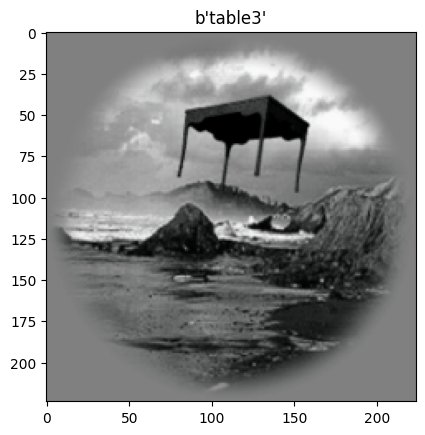

In [6]:
stim_idx = 1

visualize_img(stimulus_train,objects_train,stim_idx)

(2592, 168)

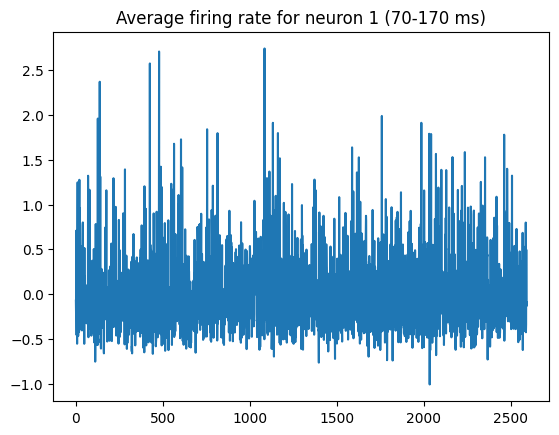

In [7]:
neuron_idx = 1

plt.figure()
plt.title('Average firing rate for neuron {} (70-170 ms)'.format(neuron_idx))
plt.plot(spikes_train[:,2])
spikes_train.shape

## Predict the neural activity using a data-driven approach

In the first part of the project, you have predicted the neural activity either from pixels or from the activations of a pre-trained neural network model. Here, your objective is to build and train a shallow convolutional neural network to predict the IT neural activity.

Follow these steps:
- Create the dataloader
- Define the model (Shallow CNN with 2/3 layers)
- Define the loss function (MSE) and the optimizer
- Build the training script and train your model
- Evaluate the predictions of your model. 
- Compare the neural predictions with the ones achieved by the task-trained neural network model. Which one can better predict the neural activity?

In [8]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
#for nn à voir
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten


import torch
import torch.nn as nn
import torch.optim as optim


In [9]:
#prepare x_train and x_test
X_train = stimulus_train.reshape(2592, 3*224*224) 
y_train = spikes_train
X_test = stimulus_val.reshape(288, 3*224*224)  #utiliser val ou test ?? ASSISTANT
y_test = spikes_val

In [10]:
X_train.shape
X_train2 =np.reshape(X_train, (2592, 3, 224, 224))
X_train2.shape
X_test2 = np.reshape(X_test, (288, 3, 224, 224))

# STOP UNTIL ALGO

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error

# Step 1: Create the dataloader
# Assuming X_train, X_test, y_train, y_test are already loaded

# Create custom dataset class for handling input data
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __getitem__(self, index):
        x = torch.tensor(self.X[index], dtype=torch.float32)
        y = torch.tensor(self.y[index], dtype=torch.float32)
        return x, y

    def __len__(self):
        return len(self.X)

# Create dataloaders for training and testing data
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [ ]:
# Step 2: Define the model
class ShallowCNN(nn.Module):
    def __init__(self):
        super(ShallowCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)  # 3 input channels, 16 output channels, 3x3 kernel
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)  # 2x2 max pooling
        self.conv2 = nn.Conv2d(16, 32, 3)  # 16 input channels, 32 output channels, 3x3 kernel
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)  # 2x2 max pooling
        # Add more convolutional layers if desired

        self.fc = nn.Linear(32 * 54 * 54, 168)  # Fully connected layer

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 32 * 54 * 54)
        x = self.fc(x)
        return x





In [ ]:
# Step 3: Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Build the training script and train the model
def train(model, dataloader, criterion, optimizer):
    model.train()  # Set model to training mode
    for i, (inputs, targets) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Train the model
epochs = 10
for epoch in range(epochs):
    train(model, train_dataloader, criterion, optimizer)
    print(f"Epoch {epoch + 1}/{epochs} completed")



# Step 5: Evaluate the predictions of the model
def evaluate(model, dataloader, criterion):
    model.eval()  # Set model to evaluation mode
    loss = 0
    predictions = []
    with torch.no_grad():
        for inputs, targets in dataloader:
            outputs = model(inputs)
            loss += criterion(outputs, targets).item()
            predictions.append(outputs.detach().numpy())

    loss /= len(dataloader)  # Average loss
    predictions = np.concatenate(predictions, axis=0)  # Concatenate predictions into a single array
    return loss, predictions

In [ ]:
# Call the evaluation function on the test dataloader
test_loss, test_predictions = evaluate(model, test_dataloader, criterion)

# Calculate mean squared error (MSE) for evaluation
y_test_pred = np.argmax(test_predictions, axis=1)  # Convert predictions to labels by taking the index with max value
y_test_true = np.argmax(y_test, axis=1)  # Convert ground truth to labels by taking the index with max value
mse = mean_squared_error(y_test_true, y_test_pred)
print("Test Loss: {:.4f}".format(test_loss))
print("Mean Squared Error (MSE): {:.4f}".format(mse))

In [ ]:
#ALGO Beginning

In [14]:
#1 Create data loader
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __getitem__(self, index):
        x = self.X[index]
        y = self.y[index]
        return x, y

    def __len__(self):
        return len(self.X)

# Create the dataloader for training data
train_dataset = CustomDataset(X_train2, y_train)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Create the dataloader for testing data
test_dataset = CustomDataset(X_test2, y_test)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


In [15]:
#2 define the model (CNN with 2 or 3 layers)

class ShallowCNN_(nn.Module):
    def __init__(self, num_features=168):
        super(ShallowCNN_, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc = nn.Linear(64 * 56 * 56, num_features)  # Assumes input image size of 224x224

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(-1, 64 * 56 * 56)  # Assumes input image size of 224x224
        x = self.fc(x)
        return x

In [16]:
# Instantiate the shallow CNN model with 2 or 3 layers
#num_layers = 2  # Choose between 2 and 3
#model = ShallowCNN(num_layers=num_layers)
model = ShallowCNN_()

#3 Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [17]:
#4 Training loop
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_dataloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")



/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([64, 1, 168])) that is different to the input size (torch.Size([1024, 168])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32, 1, 168])) that is different to the input size (torch.Size([512, 168])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10], Loss: 0.1330
Epoch [2/10], Loss: 0.1313
Epoch [3/10], Loss: 0.1483
Epoch [4/10], Loss: 0.1094
Epoch [5/10], Loss: 0.1321


KeyboardInterrupt: 

In [ ]:
#5 Evaluation
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        test_loss += criterion(outputs, targets.unsqueeze(1)).item()
test_loss /= len(test_dataloader)
print(f"Test Loss: {test_loss:.4f}")

In [ ]:
#end

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split

# Define your dataset class
class ITNeuralActivityDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]

        if self.transform:
            x = self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)

# Define your shallow CNN model
class ShallowCNN(nn.Module):
    def __init__(self):
        super(ShallowCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 8 * 8, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



class ShallowCNN2(nn.Module):
    def __init__(self):
        super(ShallowCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 16 * 16, 64)  # Update input size based on the output size of previous layers
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = x.view(-1, 16 * 16 * 16)  # Update input size based on the output size of previous layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define your data loader
# Assume you have loaded your data and labels into 'data' and 'labels' variables respectively
# and split them into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

#MY CODE
# Dataloaders
training_set = list(zip(X_train,y_train))
#Dataset(X_train, y_train)
training_generator = torch.utils.data.DataLoader(training_set, batch_size=64, shuffle=True)

validation_set = list(zip(X_test,y_test))
#Dataset(X_test, y_test)
validation_generator = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=True)

# Apply data augmentation and normalization if needed using torchvision transforms

train_dataset = ITNeuralActivityDataset(train_data, train_labels, transform=ToTensor())
test_dataset = ITNeuralActivityDataset(test_data, test_labels, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define your loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize your model
model = ShallowCNN2()

# Train your model
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.train()

for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        # Print loss for each batch
        print('Epoch [{}/{}], Batch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

# Evaluate your model
model.eval()
with torch.no_grad():


In [20]:


# Define the shallow CNN model with 2 or 3 layers
class ShallowCNN(nn.Module):
    def __init__(self, num_layers=2):
        super(ShallowCNN, self).__init__()
        self.num_layers = num_layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        if self.num_layers == 3:
            self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
            self.relu2 = nn.ReLU()
            self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(16 * 14 * 14, 1)  # Assuming input image size is 28x28

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        if self.num_layers == 3:
            x = self.conv2(x)
            x = self.relu2(x)
            x = self.maxpool2(x)
        x = x.view(-1, 16 * 14 * 14)
        x = self.fc(x)
        return x




In [28]:
# Dataloaders
training_set = list(zip(X_train,y_train))
#Dataset(X_train, y_train)
training_generator = torch.utils.data.DataLoader(training_set, batch_size=64, shuffle=True)

validation_set = list(zip(X_test,y_test))
#Dataset(X_test, y_test)
validation_generator = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=True)

In [ ]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [ ]:
# defining the model
model = Net()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()  #MSE !
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

In [ ]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train = Variable(train_x), Variable(train_y)
    # getting the validation set
    x_val, y_val = Variable(val_x), Variable(val_y)
    # converting the data into GPU format
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        x_val = x_val.cuda()
        y_val = y_val.cuda()

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train)
    output_val = model(x_val)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_losses.append(loss_train)
    val_losses.append(loss_val)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [ ]:
# defining the number of epochs
n_epochs = 25
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

In [ ]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [ ]:
# prediction for validation set
with torch.no_grad():
    output = model(val_x.cuda())

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on validation set
accuracy_score(val_y, predictions)

In [36]:
len(training_set[2][1])

168

In [21]:
X_test.shape

(288, 150528)

In [20]:
y_test.shape

(288, 168)

In [6]:
# function from pytorch, take the data set => and takes batch-size to train
#Dataloader
train_dataloader = DataLoader(X_train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(X_test, batch_size=64, shuffle=True)

In [ ]:
#ALGO 2

In [25]:
print(X_train2.shape)
print(X_test2.shape)

(2592, 3, 224, 224)
(288, 3, 224, 224)


In [27]:
print(y_train.shape)
print(y_test.shape)

(2592, 168)
(288, 168)


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error

# Step 1: Create the dataloader
# Assuming X_train2, X_test2, y_train, y_test are already loaded

# Create custom dataset class for handling input data
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __getitem__(self, index):
        x = torch.tensor(self.X[index], dtype=torch.float32)
        y = torch.tensor(self.y[index], dtype=torch.float32)
        return x, y
    
   """  def __getitem__(self, index):
        x = self.X[index]
        y = self.y[index]
        return x, y"""


    def __len__(self):
        return len(self.X)

# Create dataloaders for training and testing data
train_dataset = MyDataset(X_train2, y_train)
test_dataset = MyDataset(X_test2, y_test)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)



# Step 2: Define the model
class ShallowCNN(nn.Module):
    def __init__(self):
        super(ShallowCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)  # 3 input channels, 16 output channels, 3x3 kernel
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)  # 2x2 max pooling
        self.conv2 = nn.Conv2d(16, 32, 3)  # 16 input channels, 32 output channels, 3x3 kernel
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)  # 2x2 max pooling
        # Add more convolutional layers if desired

        self.fc = nn.Linear(32 * 54 * 54, 168)  # Fully connected layer

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 32 * 54 * 54)
        x = self.fc(x)
        return x

# Step 3: Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Build the training script and train the model
def train(model, dataloader, criterion, optimizer):
    model.train()  # Set model to training mode
    for i, (inputs, targets) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Train the model
epochs = 10
for epoch in range(epochs):
    train(model, train_dataloader, criterion, optimizer)
    print(f"Epoch {epoch + 1}/{epochs} completed")

# Step 5: Evaluate the predictions of the model
def evaluate(model, dataloader, criterion):
    model.eval()  # Set model to evaluation mode
    loss = 0
    predictions = []
    with torch.no_grad():
        for inputs, targets in dataloader:
            outputs = model(inputs)
            loss += criterion(outputs, targets).item()
            predictions.append(outputs.detach().numpy())


RuntimeError: The size of tensor a (512) must match the size of tensor b (32) at non-singleton dimension 0

In [ ]:
# Call the evaluation function on the test dataloader
test_loss, test_predictions = evaluate(model, test_dataloader, criterion)

# Calculate mean squared error (MSE) for evaluation
y_test_pred = np.argmax(test_predictions, axis=1)  # Convert predictions to labels by taking the index with max value
y_test_true = np.argmax(y_test, axis=1)  # Convert ground truth to labels by taking the index with max value
mse = mean_squared_error(y_test_true, y_test_pred)
print("Test Loss: {:.4f}".format(test_loss))
print("Mean Squared Error (MSE): {:.4f}".format(mse))

#Note: This assumes that y_test is the ground truth for neural activity, and test_predictions is the predicted output from the model. The mean_squared_error function from scikit-learn library is used to calculate the MSE between the ground truth and predicted output labels.



# Plot performance
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(y_test_true, 'bo-', label='Ground Truth')
ax.plot(y_test_pred, 'go-', label='Predictions')
ax.set_xlabel('Samples')
ax.set_ylabel('Labels')
ax.legend()
plt.title('Ground Truth vs. Predictions')
plt.show()

In [15]:
stimulus_train.shape[0]

2592

# ALGOS

In [12]:
# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train2)
y_train_tensor = torch.tensor(y_train)
X_test_tensor = torch.tensor(X_test2)
y_test_tensor = torch.tensor(y_test)

# Create data loaders
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


### Different models

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Input dimension
input_channels = 3  # RGB channels
input_size = 224     # Image size (224x224)
input_samples_train = 2592  # Number of training input samples
input_samples_test = 288   # Number of testing input samples

# Output dimension
output_size = 168    # Number of output classes (neural activity)

# Define the Shallow CNN model
class ShallowCNN(nn.Module):
    def __init__(self):
        super(ShallowCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 112 * 112, 512)
        self.fc2 = nn.Linear(512, 168)  # Output dimension for regression

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = x.view(-1, 32 * 112 * 112)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x.view(-1, 168)
    
"""    
# Define the Shallow CNN model
class ShallowCNN2(nn.Module):
    def __init__(self):
        super(ShallowCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 112 * 112, 512)
        self.fc2 = nn.Linear(512, 168)  # Output dimension for regression

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = x.view(-1, 32 * 112 * 112)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x.view(-1, 168)
"""

# Create the Shallow CNN model instance
model = ShallowCNN()

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer
#optimizer = optim.Adam(model.parameters(), lr=0.005) #0.1411 for 0.001
optimizer = optim.SGD(model.parameters(), lr=0.06)





## Different model evaluation

In [20]:
# Training loop
num_epochs = 10  # Set the number of epochs for training
y_test_pred = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for batch_idx, (inputs, targets) in enumerate(train_dataloader):
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update the weights
    #prev_loss = 1
    # Evaluation
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        total_loss = 0
        for batch_idx, (inputs, targets) in enumerate(test_dataloader):
            outputs = model(inputs)
            #predicted_labels = outputs # Get the predicted labels with highest activation
            #y_test_pred.extend(predicted_labels.tolist())  # Append predicted labels to the list

            loss = criterion(outputs, targets)
            total_loss += loss.item()
        avg_loss = total_loss / len(test_dataloader)
        #if (prev_loss-avg_loss <= 0.0001)
            #break
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')

Epoch [1/10], Average Loss: 0.1373
Epoch [2/10], Average Loss: 0.1347
Epoch [3/10], Average Loss: 0.1302
Epoch [4/10], Average Loss: 0.1283
Epoch [5/10], Average Loss: 0.1246
Epoch [6/10], Average Loss: 0.1226
Epoch [7/10], Average Loss: 0.1215
Epoch [8/10], Average Loss: 0.1189
Epoch [9/10], Average Loss: 0.1211
Epoch [10/10], Average Loss: 0.1186


In [ ]:
#END of ALGO

### Parameters to optimize

- ShallowCNN
    - SGD:
        - lr = 0.001 => 0.1278
        - lr = 0.01 => 0.1229
        - lr = 0.005 => 0.1256
        - lr = 0.03 => 0.1247
        - lr = 0.05 => 0.1170
        - lr = 0.06 => descend jusqu'à 0.1189 avant de remonter, puis redescend à 0.1186
        - lr = 0.07 => 0.1277
        - lr = 0.1 => 0.12
        
     - Adam:
         - lr = 0.01 => 0.3-0.4 (nul)
         - lr = 0.001 => 0.1411
         
- ShallowCNN2
    - SGD:
        - lr = 0.05 => 


In [108]:
y_test_pred.shape
y_test.shape

(288, 168)

In [110]:
y_test_pred = []
for batch_idx, (inputs, targets) in enumerate(test_dataloader):
            outputs = model(inputs)
            predicted_labels = outputs # Get the predicted labels with highest activation
            y_test_pred.extend(predicted_labels.tolist())  # Append predicted labels to the list


In [119]:
from sklearn import metrics as ms
from scipy.stats import pearsonr

y_test_pred = np.array(y_test_pred)

correlation = []
var = []

for i in range(y_test.shape[1]) : #each neuron
    correlation.append(pearsonr(y_test_pred[:,i],y_test[:,i])[0])
    var.append(ms.explained_variance_score(y_test[:,i],y_test_pred[:,i]))

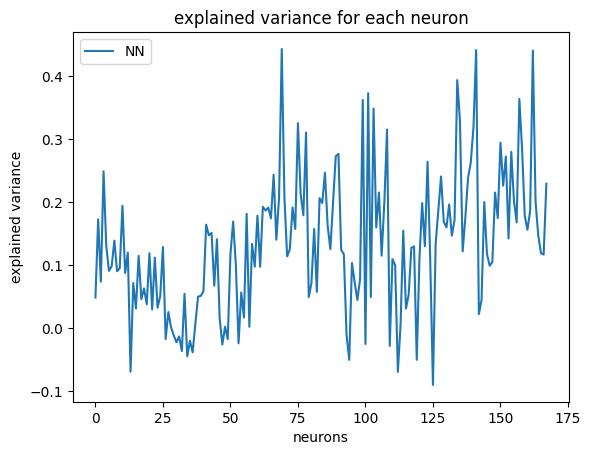

In [120]:
plt.figure()
plt.title('explained variance for each neuron')
plt.xlabel('neurons')
plt.ylabel("explained variance")

plt.plot(var)
#plt.plot(var_linear)
#plt.plot(var)
#plt.legend(["ridge","linear","ridge vs linear"])
plt.legend(["NN"])

plt.show()


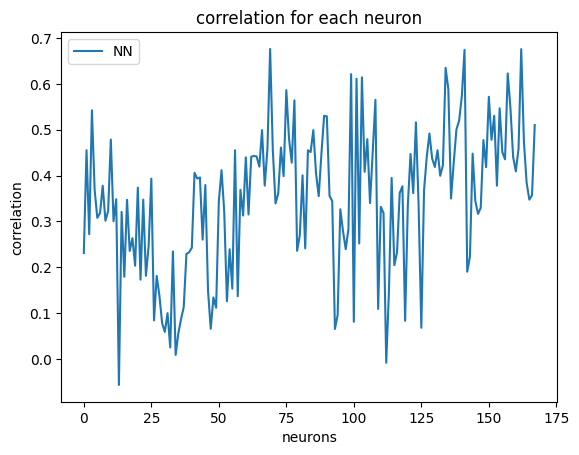

In [118]:
plt.figure()
plt.title('correlation for each neuron')
plt.xlabel('neurons')
plt.ylabel("correlation")

plt.plot(correlation)
#plt.plot(correlation_linear)
#plt.plot(correlation)
#plt.legend(["ridge","linear","ridge vs linear"])
plt.legend(["NN"])

plt.show()

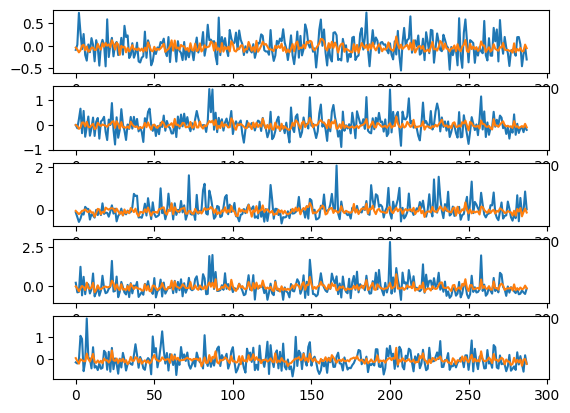

In [116]:
N = 5
fig, axs = plt.subplots(N, 1)

for n in range(N) : 
    axs[n].plot(y_test[:,n])
    axs[n].plot(y_test_pred[:,n])

plt.show()

In [73]:
# Evaluation of predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_test_pred = []  # To store the predicted labels
    for batch_idx, (inputs, targets) in enumerate(test_dataloader):
        outputs = model(inputs)
        predicted_labels = outputs # Get the predicted labels with highest activation
        y_test_pred.extend(predicted_labels.tolist())  # Append predicted labels to the list

# Convert predicted labels to numpy array
y_test_pred = np.array(y_test_pred)


# Calculate accuracy

print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.0000


In [78]:
# Set the model to evaluation mode
model.eval()

# Initialize the total MSE loss
total_mse = 0

# Disable gradient computation for evaluation
with torch.no_grad():
    for i, (inputs, targets) in enumerate(test_dataloader):
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Forward pass
        outputs = model(inputs)

        # Compute MSE loss
        mse = criterion(outputs, targets)
        total_mse += mse.item() * inputs.size(0)  # Multiply by batch size

# Calculate the average MSE loss
avg_mse = total_mse / len(test_dataloader.dataset)

print(f'Average MSE Loss: {avg_mse:.4f}')

Average MSE Loss: 0.1321


In [50]:
import matplotlib.pyplot as plt

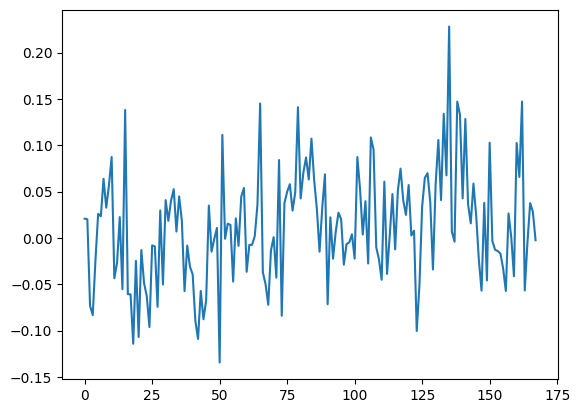

In [75]:
plt.plot(y_test_pred[0])

In [76]:
y_test.shape

(288, 168)

In [77]:
y_test_pred.shape

(288, 168)

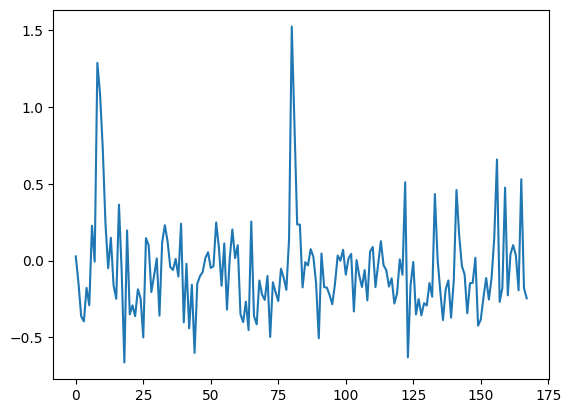

In [60]:
plt.plot(y_test[1])